In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import (
    ImageQuant2,
    bounded_mean_1d,
    direcslist,
    dosage,
    load_image,
    raw_data_path,
)

%matplotlib widget

In [2]:
# Specify paths
path = raw_data_path + "/Imaging/ring_ph"
paths = direcslist(path, 1)
lines = [p.strip("/").split("/")[-2].split("_")[1] for p in paths]
conditions = [p.strip("/").split("/")[-2].split("_")[2] for p in paths]

# Import data
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

# Import quantification model
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]
print(calibration_factor)

3.105838399548696


  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<06:28,  1.54it/s]

  1%|█▋                                                                                                                                               | 7/600 [00:00<00:49, 11.96it/s]

  2%|███                                                                                                                                             | 13/600 [00:00<00:27, 21.27it/s]

  3%|████▌                                                                                                                                           | 19/600 [00:00<00:19, 29.62it/s]

  4%|██████                                                                                                                                          | 25/600 [00:01<00:15, 35.96it/s]

  5%|███████▍                                                                                                                                        | 31/600 [00:01<00:13, 40.79it/s]

  6%|████████▉                                                                                                                                       | 37/600 [00:01<00:13, 43.12it/s]

  7%|██████████▎                                                                                                                                     | 43/600 [00:01<00:11, 46.71it/s]

  8%|███████████▊                                                                                                                                    | 49/600 [00:01<00:11, 49.43it/s]

  9%|█████████████▏                                                                                                                                  | 55/600 [00:01<00:10, 51.18it/s]

 10%|██████████████▋                                                                                                                                 | 61/600 [00:01<00:10, 52.37it/s]

 11%|████████████████                                                                                                                                | 67/600 [00:01<00:09, 53.56it/s]

 12%|█████████████████▌                                                                                                                              | 73/600 [00:01<00:09, 54.53it/s]

 13%|██████████████████▉                                                                                                                             | 79/600 [00:02<00:09, 55.63it/s]

 14%|████████████████████▋                                                                                                                           | 86/600 [00:02<00:08, 57.37it/s]

 16%|██████████████████████▎                                                                                                                         | 93/600 [00:02<00:08, 58.47it/s]

 17%|███████████████████████▊                                                                                                                       | 100/600 [00:02<00:08, 59.95it/s]

 18%|█████████████████████████▌                                                                                                                     | 107/600 [00:02<00:08, 60.72it/s]

 19%|███████████████████████████▏                                                                                                                   | 114/600 [00:02<00:08, 60.32it/s]

 20%|████████████████████████████▊                                                                                                                  | 121/600 [00:02<00:08, 59.43it/s]

 21%|██████████████████████████████▎                                                                                                                | 127/600 [00:02<00:08, 58.91it/s]

 22%|███████████████████████████████▉                                                                                                               | 134/600 [00:02<00:07, 60.35it/s]

 24%|█████████████████████████████████▌                                                                                                             | 141/600 [00:03<00:07, 59.94it/s]

 25%|███████████████████████████████████▎                                                                                                           | 148/600 [00:03<00:07, 60.27it/s]

 26%|████████████████████████████████████▉                                                                                                          | 155/600 [00:03<00:07, 60.48it/s]

 27%|██████████████████████████████████████▌                                                                                                        | 162/600 [00:03<00:07, 59.39it/s]

 28%|████████████████████████████████████████▎                                                                                                      | 169/600 [00:03<00:07, 59.64it/s]

 29%|█████████████████████████████████████████▉                                                                                                     | 176/600 [00:03<00:07, 59.90it/s]

 30%|███████████████████████████████████████████▌                                                                                                   | 183/600 [00:03<00:06, 60.17it/s]

 32%|█████████████████████████████████████████████▎                                                                                                 | 190/600 [00:03<00:06, 58.94it/s]

 33%|██████████████████████████████████████████████▋                                                                                                | 196/600 [00:04<00:06, 57.79it/s]

 34%|████████████████████████████████████████████████▏                                                                                              | 202/600 [00:04<00:07, 56.85it/s]

 35%|█████████████████████████████████████████████████▌                                                                                             | 208/600 [00:04<00:06, 56.92it/s]

 36%|███████████████████████████████████████████████████                                                                                            | 214/600 [00:04<00:06, 57.54it/s]

 37%|████████████████████████████████████████████████████▋                                                                                          | 221/600 [00:04<00:06, 58.89it/s]

 38%|██████████████████████████████████████████████████████                                                                                         | 227/600 [00:04<00:06, 59.14it/s]

 39%|███████████████████████████████████████████████████████▊                                                                                       | 234/600 [00:04<00:06, 59.97it/s]

 40%|█████████████████████████████████████████████████████████▍                                                                                     | 241/600 [00:04<00:05, 60.78it/s]

 41%|███████████████████████████████████████████████████████████                                                                                    | 248/600 [00:04<00:05, 60.02it/s]

 42%|████████████████████████████████████████████████████████████▊                                                                                  | 255/600 [00:05<00:05, 60.65it/s]

 44%|██████████████████████████████████████████████████████████████▍                                                                                | 262/600 [00:05<00:05, 59.04it/s]

 45%|███████████████████████████████████████████████████████████████▊                                                                               | 268/600 [00:05<00:05, 58.18it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                             | 274/600 [00:05<00:05, 58.19it/s]

 47%|██████████████████████████████████████████████████████████████████▉                                                                            | 281/600 [00:05<00:05, 59.20it/s]

 48%|████████████████████████████████████████████████████████████████████▋                                                                          | 288/600 [00:05<00:05, 59.66it/s]

 49%|██████████████████████████████████████████████████████████████████████                                                                         | 294/600 [00:05<00:05, 59.72it/s]

 50%|███████████████████████████████████████████████████████████████████████▋                                                                       | 301/600 [00:05<00:04, 59.85it/s]

 51%|█████████████████████████████████████████████████████████████████████████▏                                                                     | 307/600 [00:05<00:04, 59.75it/s]

 52%|██████████████████████████████████████████████████████████████████████████▌                                                                    | 313/600 [00:05<00:04, 59.60it/s]

 53%|████████████████████████████████████████████████████████████████████████████                                                                   | 319/600 [00:06<00:04, 57.56it/s]

 54%|█████████████████████████████████████████████████████████████████████████████▍                                                                 | 325/600 [00:06<00:04, 55.79it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▉                                                                | 331/600 [00:06<00:04, 56.79it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▌                                                              | 338/600 [00:06<00:04, 57.67it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▉                                                             | 344/600 [00:06<00:04, 58.13it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████▍                                                           | 350/600 [00:06<00:04, 56.61it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▊                                                          | 356/600 [00:06<00:04, 55.51it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████▎                                                        | 362/600 [00:06<00:04, 55.03it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████████▋                                                       | 368/600 [00:06<00:04, 55.59it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 374/600 [00:07<00:04, 55.66it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 380/600 [00:07<00:03, 55.48it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 386/600 [00:07<00:03, 55.24it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 392/600 [00:07<00:03, 54.87it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 398/600 [00:07<00:03, 55.62it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 404/600 [00:07<00:03, 55.99it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 410/600 [00:07<00:03, 56.35it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 416/600 [00:07<00:03, 56.51it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 422/600 [00:07<00:03, 56.65it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 429/600 [00:08<00:02, 58.52it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 435/600 [00:08<00:02, 58.73it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 441/600 [00:08<00:02, 58.66it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 448/600 [00:08<00:02, 59.64it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 455/600 [00:08<00:02, 60.34it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 462/600 [00:08<00:02, 60.07it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 469/600 [00:08<00:02, 58.85it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 476/600 [00:08<00:02, 60.26it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 483/600 [00:08<00:01, 60.61it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 490/600 [00:09<00:01, 60.69it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 497/600 [00:09<00:01, 61.29it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 504/600 [00:09<00:01, 61.54it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 511/600 [00:09<00:01, 61.95it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 518/600 [00:09<00:01, 62.56it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 525/600 [00:09<00:01, 62.42it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 532/600 [00:09<00:01, 62.25it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 539/600 [00:09<00:00, 61.64it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 546/600 [00:09<00:00, 61.75it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 553/600 [00:10<00:00, 61.20it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 560/600 [00:10<00:00, 60.86it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 567/600 [00:10<00:00, 61.13it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 574/600 [00:10<00:00, 61.83it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 581/600 [00:10<00:00, 60.82it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 588/600 [00:10<00:00, 59.99it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 595/600 [00:10<00:00, 59.68it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:10<00:00, 55.23it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

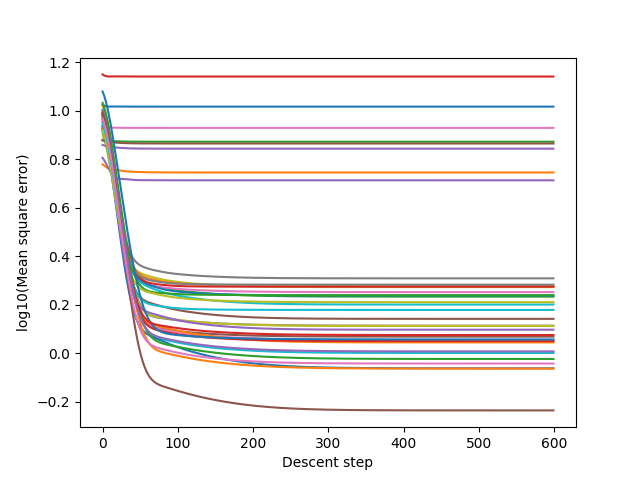

In [3]:
# Quantification
iq = ImageQuant2(
    img=imgs, roi=rois, cytbg=cytbg, membg=membg, pooling_rate=1, rol_ave=5, nfits=100
)
iq.quantify()
iq.plot_losses(log=True)

In [4]:
# iq.plot_fits()

In [5]:
# iq.plot_quantification()

In [6]:
# Compile and save results
res = iq.compile_res()
res["Membrane signal"] *= calibration_factor
res.to_csv("../../data/ring_ph_quantification.csv")

In [7]:
# Perform summary quantification
res = pd.read_csv("../../data/ring_ph_quantification.csv")
cyts = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Cytoplasmic signal"]))
mems_tot = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Membrane signal"]))
mems_ant = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.25, 0.75))
)
mems_post = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.75, 0.25))
)
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot

df_dict = {
    "Path": paths,
    "Line": lines,
    "Condition": conditions,
    "Cyt": cyts,
    "Mem_tot": mems_tot,
    "Mem_ant": mems_ant,
    "Mem_post": mems_post,
    "ASI": asis,
    "Dosage": dosages,
    "Total": totals,
}
df = pd.DataFrame(df_dict)
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/ring_ph_embryos.csv")

### Remove polar body

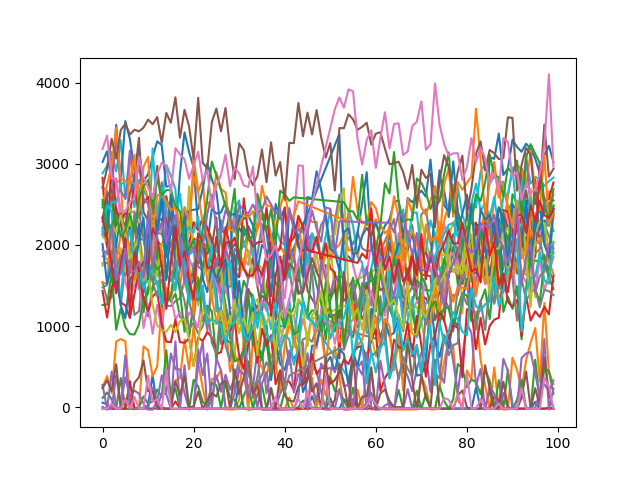

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]


fig, ax = plt.subplots()
res = pd.read_csv("../../data/ring_ph_quantification.csv")
res_grouped = res.groupby("EmbryoID")
for (g, r), p, roi in zip(res_grouped, paths, rois):
    _mems = r["Membrane signal"]
    mems = _mems.to_numpy()
    if os.path.exists(p + "/polar_body.txt"):
        polar_body = np.loadtxt(p + "/polar_body.txt")
        ind = int(
            100 * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0]
        )
        mems[ind - 5 : ind + 5] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])
    ax.plot(mems)
    res.loc[_mems.index, "Membrane signal"] = mems
res.to_csv("../../data/ring_ph_quantification_no_pb.csv")

In [9]:
# Perform summary quantification
res = pd.read_csv("../../data/ring_ph_quantification_no_pb.csv")
cyts = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Cytoplasmic signal"]))
mems_tot = res.groupby("EmbryoID").apply(lambda x: np.mean(x["Membrane signal"]))
mems_ant = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.25, 0.75))
)
mems_post = res.groupby("EmbryoID").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.75, 0.25))
)
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot

df_dict = {
    "Path": paths,
    "Line": lines,
    "Condition": conditions,
    "Cyt": cyts,
    "Mem_tot": mems_tot,
    "Mem_ant": mems_ant,
    "Mem_post": mems_post,
    "ASI": asis,
    "Dosage": dosages,
    "Total": totals,
}
df = pd.DataFrame(df_dict)
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/ring_ph_embryos_no_pb.csv")